## Pendahuluan

Dalam banyak bidang fisika dan rekayasa, seperti rangkaian listrik, sistem mekanik, kinetika kimia, dan perpindahan panas, persamaan penting yang terlibat sebagai representasi hukum alam adalah persamaan diferensial biasa / PDB (atau *ordinary differential equation* / ODE). Seringkali PDB ini tidak memiliki solusi analitik atau terlalu kompleks untuk diselesaikan sehingga kita perlu menggunakan metode numerik. **Metode Euler** adalah salah satu skema penyelesaian PDB paling sederhana dengan memanfaatkan gagasan dasar diskretisasi waktu dan pendefinisian solusi setiap langkah dalam interval kecil. Metode Euler selalu dijadikan sebagai contoh ideal paling awal untuk mempelajari solusi persamaan diferensial secara numerik sebelum menggunakan integrator orde lebih tinggi.D


## Permasalahan yang ingin dipecahkan

Kita meninjau masalah nilai awal (*initial value problem*) berupa:

$$
\frac{dy}{dt} = f(t, y), \\ y(t_0) = y_0,
$$

dengan $y\in\mathbb{R}^n$ dan $f:\mathbb{R}\times\mathbb{R}^n\to\mathbb{R}^n$. Tujuannya adalah untuk mendekati $y(t)$ pada rentang waktu $t_0 \le t \le t_{\mathrm{final}}$ dengan nilai-nilai diskret. 

**Catatan**: Variabel $t$ secara umum bisa variabel lain, tidak mesti waktu.


## Teori Dasar dan Penurunan Metode Euler

### Diskretisasi Variabel

1. **Grid waktu.** Bagi interval $[t_0, t_{\mathrm{final}}]$ menjadi $N$ langkah sama besar dengan ukuran $\Delta t = (t_{\mathrm{final}} - t_0)/N$. Definisikan waktu diskret:

   $$
   t_k = t_0 + k\,\Delta t, \quad k = 0,1,2,\dots,N.
   $$

2. **Pendekatan solusi.** Tuliskan $y_k \approx y(t_k)$. Tujuannya adalah menghitung $y_1, y_2, \dots, y_N$ dengan hanya menggunakan nilai awal $y_0$.

3. **Aproksimasi beda hingga.** Turunan $dy/dt$ di $t_k$ dapat diaproksimasi menggunakan beda hingga. Dua pilihan umum menghasilkan skema eksplisit dan implisit:

   * **Beda maju (forward difference)** pada $t_k$:

     $$
     \left.\frac{dy}{dt}\right|_{t_k} \approx \frac{y_{k+1}-y_k}{\Delta t}.
     $$
   * **Beda mundur (backward difference)** pada $t_{k+1}$:

     $$
     \left.\frac{dy}{dt}\right|_{t_{k+1}} \approx \frac{y_{k+1}-y_k}{\Delta t}.
     $$

### Metode Euler Eksplisit

Mulai dari PDB pada $t_k$:

$$
\frac{dy}{dt} = f(t, y) \quad\Longrightarrow\quad \left.\frac{dy}{dt}\right|_{t_k} = f(t_k, y_k).
$$

Gantikan turunan waktu dengan beda hingga maju:

$$
\frac{y_{k+1}-y_k}{\Delta t} = f(t_k, y_k) + \mathcal{O}(\Delta t).
$$

Susun ulang untuk $y_{k+1}$:

$$
\boxed{ y_{k+1} = y_k + \Delta t\,f(t_k, y_k). }
$$

* **Local truncation error (LTE)** berasal dari suku $\mathcal{O}(\Delta t)$ yang diabaikan: $\mathrm{LTE} = \mathcal{O}(\Delta t^2)$.
* **Kesalahan global** setelah $N$ langkah berskala $\mathcal{O}(\Delta t)$, sehingga akurasi orde pertama.

### Metode Euler Implisit

Evaluasi PDB pada langkah berikutnya $t_{k+1}$:

$$
\left.\frac{dy}{dt}\right|_{t_{k+1}} = f(t_{k+1}, y_{k+1}).
$$

Gunakan beda mundur:

$$
\frac{y_{k+1}-y_k}{\Delta t} = f(t_{k+1}, y_{k+1}) + \mathcal{O}(\Delta t).
$$

Susun ulang:

$$
\boxed{ y_{k+1} = y_k + \Delta t\,f(t_{k+1}, y_{k+1}). }
$$

* Persamaan ini **implisit** untuk $y_{k+1}$, umumnya memerlukan pemecah nonlinear (misal iterasi titik tetap atau metode Newton).
* Stabilitas sangat baik

### Ringkasan Formula

| Metode              | Rumus Perbaruan Titik                           | Butuh Solver Khusus?  |
| ------------------- | ----------------------------------------------- | ------------- |
| **Euler Eksplisit** | $y_{k+1} = y_k + \Delta t\,f(t_k, y_k)$         | Tidak         |
| **Euler Implisit**  | $y_{k+1} = y_k + \Delta t\,f(t_{k+1}, y_{k+1})$ | Ya (iteratif) |



## Algoritma / Proses Langkah-demi-Langkah

### Euler Eksplisit

1. Pilih $\Delta t$ dan hitung $N = \lceil (t_{\mathrm{final}} - t_0)/\Delta t \rceil$.
2. Inisialisasi $t_0, y_0$.
3. Untuk $k = 0,1,2,\dots,N-1$:

   1. Hitung $f_k = f(t_k, y_k)$.
   2. Update $y_{k+1} = y_k + \Delta t\,f_k$.
   3. Majukan waktu: $t_{k+1} = t_k + \Delta t$.

### Euler Implisit

1. Inisialisasi seperti di atas.
2. Untuk $k = 0,1,2,\dots,N-1$:

   1. Definisikan residu $R(y) = y - y_k - \Delta t\,f(t_{k+1}, y)$.
   2. Selesaikan $R(y_{k+1}) = 0$ untuk $y_{k+1}$ (misal metode Newton).
   3. Set $t_{k+1} = t_k + \Delta t$.



## Contoh 1: Rangkaian RC (PDB Orde Pertama)

$C\frac{dV}{dt} + \frac{V}{R} = 0, \quad V(0)=V_0.$
Menjadi $\frac{dV}{dt} = -\tfrac{1}{RC}V$.

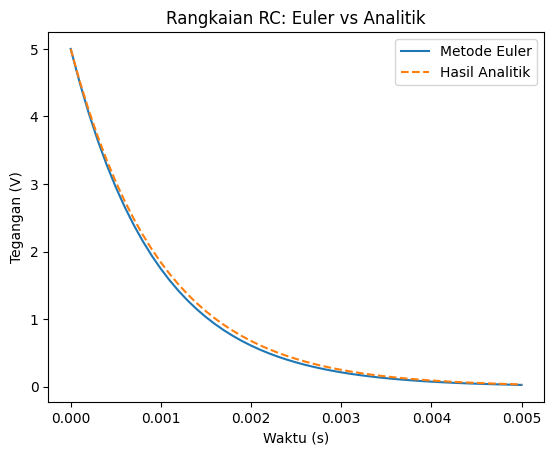

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
R, C = 1e3, 1e-6      # R=1 kΩ, C=1 μF
tau = R*C
V0 = 5.0             # Tegangan awal
dt = 0.1 * tau       # Langkah waktu
t_final = 5*tau

# Array waktu
t = np.arange(0, t_final + dt, dt)
V = np.zeros_like(t)
V[0] = V0

# Euler eksplisit
for k in range(len(t)-1):
    V[k+1] = V[k] - (dt/(R*C)) * V[k]

# Solusi analitik untuk perbandingan
V_true = V0 * np.exp(-t/tau)

plt.figure()
plt.plot(t, V, label='Metode Euler')
plt.plot(t, V_true, '--', label='Hasil Analitik')
plt.xlabel('Waktu (s)')
plt.ylabel('Tegangan (V)')
plt.title('Rangkaian RC: Euler vs Analitik')
plt.legend()
plt.show()


## Contoh 2: Osilator Harmonik Sederhana (PDB Orde Kedua)

Persamaan:
$\frac{d^2x}{dt^2} + \omega^2 x = 0.$

Diubah menjadi sistem orde pertama:

$$
\begin{cases}
\dot x = v,\\
\dot v = -\omega^2 x.
\end{cases}
$$


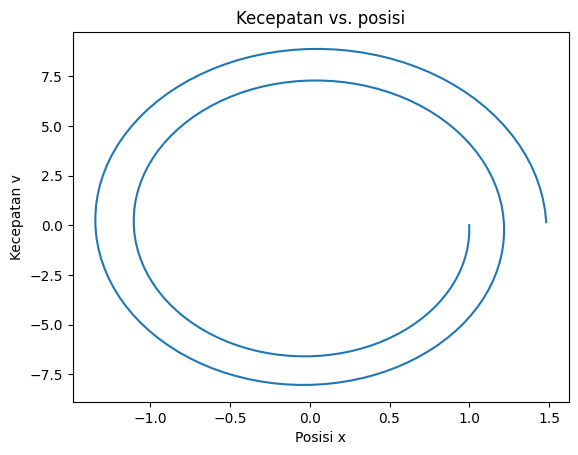

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
omega = 2*np.pi       # osilator 1 Hz
dt = 0.01             # Langkah waktu (s)
t_final = 2.0         # waktu akhir 2 s

# inisialisasi array
t = np.arange(0, t_final+dt, dt)
x = np.zeros_like(t)
v = np.zeros_like(t)
x[0], v[0] = 1.0, 0.0  # kondisi awal

# Explicit Euler
for k in range(len(t)-1):
    x[k+1] = x[k] + dt*v[k]
    v[k+1] = v[k] - dt*omega**2 * x[k]

# Plot phase space
plt.figure()
plt.plot(x, v)
plt.xlabel('Posisi x')
plt.ylabel('Kecepatan v')
plt.title('Kecepatan vs. posisi')
plt.show()


## Komparasi

| Aspek                 | Euler Eksplisit                                             | Euler Implisit                   | Runge–Kutta (misal RK4)             |
| --------------------- | ----------------------------------------------------------- | -------------------------------- | ----------------------------------- |
| **Kompleksitas**      | Sangat sederhana, mudah                                     | Lebih kompleks (perlunya solver) | Sedang                              |
| **Akurasi**           | $O(\Delta t)$                                               | $O(\Delta t)$                    | $O(\Delta t^4)$                     |
| **Stabilitas**        | Stabil bersyarat; butuh $\Delta t$ kecil untuk masalah kaku | Stabil tanpa syarat              | Stabil bersyarat, cakupanlebih luas |
| **Biaya per langkah** | Rendah                                                      | Lebih tinggi (iterasi)           | Lebih tinggi (beberapa tahap)       |
| **Penggunaan**        | Edukasi, PDB sederhana                                      | PDB lebih rumit                   | Umum, akurasi tinggi                |

* **Keunggulan Euler**:

  * Sangat sederhana; memperlihatkan konsep diskretisasi dengan jelas.
  * Biaya per langkah rendah; cocok untuk prototipe cepat.

* **Keterbatasan**:

  * Orde pertama → memerlukan $\Delta t$ sangat kecil untuk akurasi baik.
  * Euler eksplisit dapat tidak stabil pada beberapa kasus PDB.
  
* **Perbandingan dengan RK4**:

  * RK4 mencapai akurasi orde-empat, memungkinkan $\Delta t$ lebih besar untuk akurasi setara.
  * Butuh empat evaluasi $f$ per langkah, tetapi jumlah langkah total bisa jauh lebih sedikit.
  * Area stabilitas RK4 jauh lebih luas daripada Euler, cocok untuk banyak masalah PDB.
